In [1]:
# !pip install pandas matplotlib

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Time series forecasting is the process of using historical data to predict future values.  
A time series is just a series of data points in time order. It's used in areas like:  
Stock market prediction  
Weather forecasting  
Power consumption planning  
Sales forecasting  


### Creating a Date Range

In [3]:
date_rng = pd.date_range(start='2025-01-01', end='2025-02-05', freq = 'B') # Business days (doesnot includes weekends)
# date_rng = pd.date_range(start='2025-01-01', end='2025-02-05', freq = 'D') # Daily frequency
# date_rng = pd.date_range(start='2025-01-01', periods=36, freq = 'D') # 36 Days( Daily frequency) from start date
date_rng

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31', '2025-02-03',
               '2025-02-04', '2025-02-05'],
              dtype='datetime64[ns]', freq='B')

### Creating a Time Series DataFrame

In [4]:
ts_df = pd.DataFrame(date_rng, columns=["date"])
ts_df["data"] = np.random.randn(len(date_rng)) # generate random data
ts_df = ts_df.set_index("date")
ts_df.head()

,data
date,
2025-01-01,-1.390514
2025-01-02,-0.088763
2025-01-03,-0.253976
2025-01-06,-0.214264
2025-01-07,-2.175421


### Datetime Index and Frequency

In [5]:
ts_df = ts_df.asfreq('D') # Daily Frequency
ts_df.head(10) # missing values on weekend

,data
date,
2025-01-01,-1.390514
2025-01-02,-0.088763
2025-01-03,-0.253976
2025-01-04,NaN
2025-01-05,NaN
2025-01-06,-0.214264
2025-01-07,-2.175421
2025-01-08,1.303350
2025-01-09,0.975083


### Handling Missing Dates and Values

In [6]:
# ts_df = ts_df.fillna(method="pad") # forward fill values
# or
ts_df = ts_df.fillna(method="ffill")
# ts_df = ts_df.fillna(method="bfill") # backward fill values
ts_df.head(10)

,data
date,
2025-01-01,-1.390514
2025-01-02,-0.088763
2025-01-03,-0.253976
2025-01-04,-0.253976
2025-01-05,-0.253976
2025-01-06,-0.214264
2025-01-07,-2.175421
2025-01-08,1.303350
2025-01-09,0.975083


### DateTime Conversion

In [7]:
df = pd.DataFrame({'date': ['2024-01-01', '2024-01-02', '##&81@'], 'value': [10, 15, 20]})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   value   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [8]:
# by default to_datetime follows mm/dd/yy (US date format). So, if dates are in dd/mm/yy format (mostly followed in Europe & Asia), use dayFirst=True
# or supply format="%Y-%d-%m".
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [9]:
df["epochs"] = df["date"].view("int64") # to get time in epochs in nanosecs (Unix system (number of seconds since, Jan 1, 1970 UTC))
df

,date,value,epochs
0,2024-01-01,10,1704067200000000000
1,2024-02-01,15,1706745600000000000
2,NaT,20,-9223372036854775808


In [10]:
# extracting date time characteristics
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['dayofweek'] = df.date.dt.dayofweek
df.head()

,date,value,epochs,year,month,day,dayofweek
0,2024-01-01,10,1704067200000000000,2024.0,1.0,1.0,0.0
1,2024-02-01,15,1706745600000000000,2024.0,2.0,1.0,3.0
2,NaT,20,-9223372036854775808,NaN,NaN,NaN,NaN


### Loading the existing datetime data

In [11]:
# https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption
df = pd.read_csv("datasets/household_power_consumption.txt", sep=";", parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, index_col='datetime', na_values='?', low_memory=False, dtype='float32')

In [12]:
print(df.shape)
df.head(5)

(2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0


In [13]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
# df = df.fillna(method="ffill")
# df.isna().sum()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


### Indexing in Time series data

In [16]:
df.loc['2006-12-16': '2006-12-17'].shape # daily level indexing data retrieval (power consumption on 2006-12-16 & 2006-12-17)

(1836, 7)

In [17]:
df.loc['2006-12-16'].shape # power consumption on a single day

(396, 7)

In [18]:
df.loc['2006-12': '2007-01'].shape # monthly level indexing data retrieval (power consumption for 2 months)

(66636, 7)

In [19]:
df.loc['2006':'2007'].shape # yearly level indexing data retrieval (Power consumption for 2 years)

(547596, 7)

### Date Features (Year, Month, etc.)

In [20]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['second'] = df.index.second
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,dayofweek,hour,minute,second
datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,2006,12,16,5,17,24,0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,2006,12,16,5,17,25,0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,2006,12,16,5,17,26,0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,2006,12,16,5,17,27,0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,2006,12,16,5,17,28,0


# Resampling  
Resampling means changing the frequency of the time series:  
Downsampling: minute → hour/day  # Reducing the sanple size  
Upsampling: day → hour (not common unless interpolating)  # Increasing the sample size  

In [21]:
# Resampling at different frequencies
df_hourly = df.resample("H").mean()
df_daily = df.resample("D").mean()
df_monthly = df.resample("M").mean()
df_yearly = df.resample("Y").mean()
df_quaterly = df.resample("Q").mean()
df_hourly.shape, df_daily.shape, df_monthly.shape, df_yearly.shape, df_quaterly.shape

((34589, 14), (1442, 14), (48, 14), (5, 14), (17, 14))

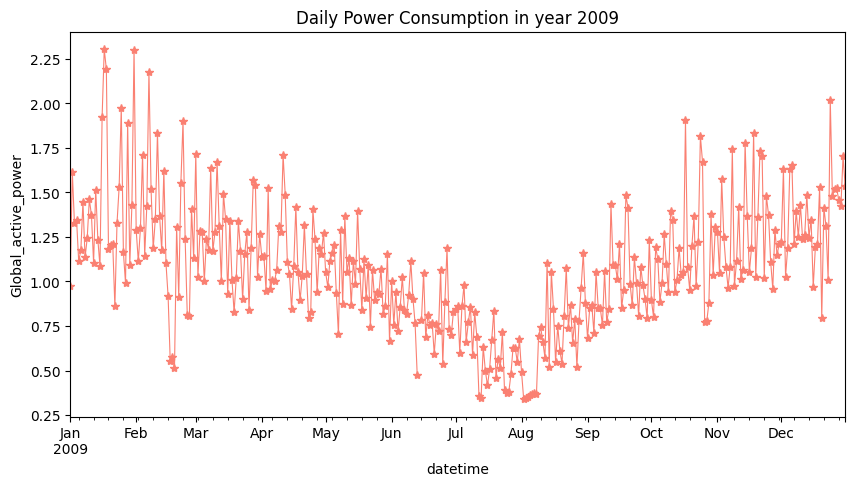

In [22]:
plt.figure(figsize=(10,5))
df_daily.loc['2009','Global_active_power'].plot(kind='line', color='salmon', linewidth='.8', marker="*")
plt.title("Daily Power Consumption in year 2009")
plt.ylabel("Global_active_power")
plt.show()

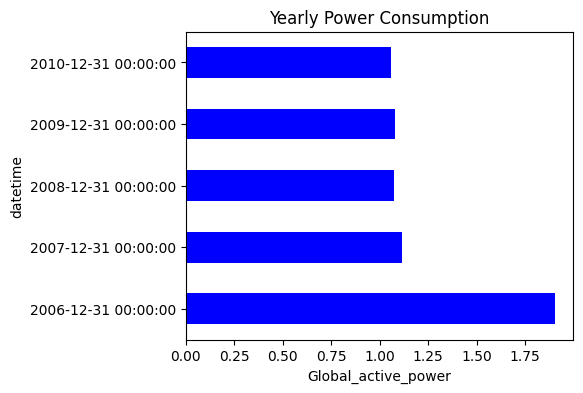

In [23]:
plt.figure(figsize=(5,4))
df_yearly['Global_active_power'].plot(kind='barh', color='blue')
plt.title("Yearly Power Consumption")
plt.xlabel("Global_active_power")
plt.show()

### Holidays  
Use Case	|    How Holidays Help  
Forecasting power demand	|    Adjust for low usage on holidays  
Retail sales analysis	|   Holidays like Christmas boost demand  
Office building sensors	|   No activity during public holidays  

In [24]:
from pandas.tseries.holiday import (AbstractHolidayCalendar, Holiday, USFederalHolidayCalendar, nearest_workday)
from pandas.tseries.offsets import CustomBusinessDay

##### Use Prebuilt Calendars (e.g. USFederalHolidayCalendar)

In [25]:
us_calendar = USFederalHolidayCalendar()
us_holidays = us_calendar.holidays(start="2006-12-01", end="2010-12-31")
us_holidays

DatetimeIndex(['2006-12-25', '2007-01-01', '2007-01-15', '2007-02-19',
               '2007-05-28', '2007-07-04', '2007-09-03', '2007-10-08',
               '2007-11-12', '2007-11-22', '2007-12-25', '2008-01-01',
               '2008-01-21', '2008-02-18', '2008-05-26', '2008-07-04',
               '2008-09-01', '2008-10-13', '2008-11-11', '2008-11-27',
               '2008-12-25', '2009-01-01', '2009-01-19', '2009-02-16',
               '2009-05-25', '2009-07-03', '2009-09-07', '2009-10-12',
               '2009-11-11', '2009-11-26', '2009-12-25', '2010-01-01',
               '2010-01-18', '2010-02-15', '2010-05-31', '2010-07-05',
               '2010-09-06', '2010-10-11', '2010-11-11', '2010-11-25',
               '2010-12-24', '2010-12-31'],
              dtype='datetime64[ns]', freq=None)

##### Define our own custom Holiday Calendar  
Since, we are analyzing data from London, it is more relevant to use UK holidays. So, we will define that.  

In [26]:
class UKHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year\'s Day', month=1, day=1, observance=nearest_workday),
        Holiday('Good Friday', month=4, day=2, observance=nearest_workday),   # use specific years for accuracy (if not constant every year)
        Holiday('Easter Monday', month=4, day=5, observance=nearest_workday),
        Holiday('Early May Bank Holiday', month=5, day=3, observance=nearest_workday),
        Holiday('Spring Bank Holiday', month=5, day=31, observance=nearest_workday),
        Holiday('Summer Bank Holiday', month=8, day=30, observance=nearest_workday),
        Holiday('Christmas Day', month=12, day=25, observance=nearest_workday),
        Holiday('Boxing Day', month=12, day=26, observance=nearest_workday),
    ]
# observance is nearest_workday i.e. if the holiday falls on weekend, we declare the closest working day as holiday

In [27]:
uk_calendar = UKHolidayCalendar()
uk_holidays = uk_calendar.holidays(start="2006-12-01", end="2010-12-31")
uk_holidays

DatetimeIndex(['2006-12-25', '2006-12-26', '2007-01-01', '2007-04-02',
               '2007-04-05', '2007-05-03', '2007-05-31', '2007-08-30',
               '2007-12-25', '2007-12-26', '2008-01-01', '2008-04-02',
               '2008-04-04', '2008-05-02', '2008-05-30', '2008-08-29',
               '2008-12-25', '2008-12-26', '2009-01-01', '2009-04-02',
               '2009-04-06', '2009-05-04', '2009-06-01', '2009-08-31',
               '2009-12-25', '2009-12-25', '2010-01-01', '2010-04-02',
               '2010-04-05', '2010-05-03', '2010-05-31', '2010-08-30',
               '2010-12-24', '2010-12-27', '2010-12-31'],
              dtype='datetime64[ns]', freq=None)

In [28]:
### Adding it to our power consumption data
df_daily["is_holiday"] = df_daily.index.normalize().isin(uk_holidays)

In [29]:
df_daily.loc[df_daily["is_holiday"]].shape[0] # 31 holidays detected between 2006-12 to 2010-12

31

In [30]:
df_daily.index

DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', name='datetime', length=1442, freq='D')

##### Visualize Power Consumption on Holidays vs Non-Holidays

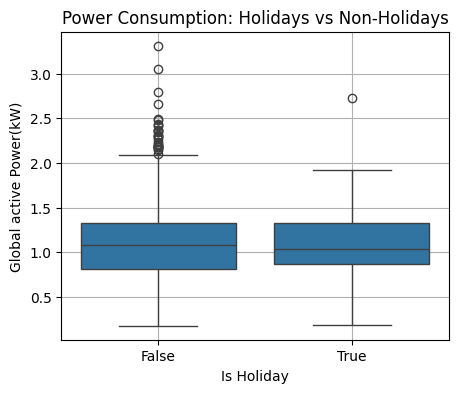

In [31]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df_daily, x="is_holiday", y="Global_active_power")
plt.title("Power Consumption: Holidays vs Non-Holidays")
plt.xlabel("Is Holiday")
plt.ylabel("Global active Power(kW)")
plt.grid(True)
plt.show()

As expected, mostly low power consumption on holidays.

##### Create business days excluding your holidays

In [32]:
my_offday = CustomBusinessDay(calendar=UKHolidayCalendar())
working_days = pd.date_range('2024-12-20', '2025-01-10', freq=my_offday)
working_days

DatetimeIndex(['2024-12-20', '2024-12-23', '2024-12-24', '2024-12-27',
               '2024-12-30', '2024-12-31', '2025-01-02', '2025-01-03',
               '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-09',
               '2025-01-10'],
              dtype='datetime64[ns]', freq='C')

### Shifting, Lagging and Rolling  
##### Shifting and Lagging:  
Goal: Use past values to engineer features or compute changes. Use Case: Forecasting models, detecting spikes, or understanding momentum.  
##### Rolling Windows (Smoothing + Aggregation)  
A rolling window is a fixed-size window that "slides" over the time series data and performs a statistical operation (like mean, sum, or std) on each window.  
Goal: Smooth short-term noise or track moving averages. Useful for detecting trends, anomalies, or seasonal effects.  


In [33]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,dayofweek,hour,minute,second
datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,2006,12,16,5,17,24,0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,2006,12,16,5,17,25,0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,2006,12,16,5,17,26,0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,2006,12,16,5,17,27,0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,2006,12,16,5,17,28,0


In [34]:
# Create lag features
df_lag = df[["Global_active_power"]].copy()
df_lag["lag_1"] = df_lag["Global_active_power"].shift(1) # Previous hour
df_lag["lag_neg1"] = df_lag["Global_active_power"].shift(-1) # next hour
df_lag["lag_24"] = df_lag["Global_active_power"].shift(24) # Same hour, previous day
# Difference from previous hour (change over time)
df_lag["diff_1"] = df_lag["Global_active_power"].diff(1)

In [35]:
df_lag[:30]

,Global_active_power,lag_1,lag_neg1,lag_24,diff_1
datetime,,,,,
2006-12-16 17:24:00,4.216,NaN,5.360,NaN,NaN
2006-12-16 17:25:00,5.360,4.216,5.374,NaN,1.144
2006-12-16 17:26:00,5.374,5.360,5.388,NaN,0.014
2006-12-16 17:27:00,5.388,5.374,3.666,NaN,0.014
2006-12-16 17:28:00,3.666,5.388,3.520,NaN,-1.722
2006-12-16 17:29:00,3.520,3.666,3.702,NaN,-0.146
2006-12-16 17:30:00,3.702,3.520,3.700,NaN,0.182
2006-12-16 17:31:00,3.700,3.702,3.668,NaN,-0.002
2006-12-16 17:32:00,3.668,3.700,3.662,NaN,-0.032


In [37]:
# Rolling windows and moving average
df_yearly["rolling_mean_3"] = df_yearly["Global_active_power"].rolling(window=3).mean()
df_yearly["rolling_sum_3"] = df_yearly["Global_active_power"].rolling(window=3).sum()
df_yearly["rolling_std_3"] = df_yearly["Global_active_power"].rolling(window=3).std()
df_yearly["rolling_max_3"] = df_yearly["Global_active_power"].rolling(window=3).max()
df_yearly[["Global_active_power", "rolling_mean_3", "rolling_sum_3", "rolling_std_3", "rolling_max_3"]]

,Global_active_power,rolling_mean_3,rolling_sum_3,rolling_std_3,rolling_max_3
datetime,,,,,
2006-12-31,1.901295,NaN,NaN,NaN,NaN
2007-12-31,1.117007,NaN,NaN,NaN,NaN
2008-12-31,1.072097,1.363466,4.090399,0.466314,1.901295
2009-12-31,1.078637,1.089247,3.267741,0.024263,1.117007
2010-12-31,1.061000,1.070578,3.211734,0.008916,1.078637


### Period & PeriodIndex  
What it does:  
Treats time as a period (like a calendar month, quarter, etc.), not an exact timestamp.  
Helpful for financial or economic time series.  

In [38]:
p = pd.Period('2024-01', freq='M') # we can set yearly(Y), Daily(D), Hourly(H), Quaterly(Q) etc. frequencies
p.start_time, p.end_time

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-31 23:59:59.999999999'))

In [39]:
dir(p)

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_offset',
 '_add_timedeltalike_scalar',
 '_dtype',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_require_matching_freq',
 'asfreq',
 'day',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [40]:
p = pd.Period('2024Q1') # default frequency Q-DEC
p.start_time, p.end_time

(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-03-31 23:59:59.999999999'))

In [41]:
p = pd.Period('2024Q1', freq='Q-JAN') # ending last fiscal year in this Jan(different from calender year). So 2023 year
p.start_time, p.end_time

(Timestamp('2023-02-01 00:00:00'), Timestamp('2023-04-30 23:59:59.999999999'))

In [42]:
p = pd.Period('2024Q2', freq='Q-JAN') # ending last fiscal year in this Jan(different from calender year)
p.start_time, p.end_time

(Timestamp('2023-05-01 00:00:00'), Timestamp('2023-07-31 23:59:59.999999999'))

In [43]:
p.asfreq('Y') # converting to yearly frequency
p.start_time, p.end_time

(Timestamp('2023-05-01 00:00:00'), Timestamp('2023-07-31 23:59:59.999999999'))

In [44]:
# Applying mathematical operations on periods (only possible on matching frequencies)
p1 = pd.Period('2024Q1', freq='Q-JAN') # from year 2023
p2 = pd.Period('2025Q2', freq='Q-JAN') # from year 2024
p1.start_time, p1.end_time, p2.start_time, p2.end_time 

(Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-04-30 23:59:59.999999999'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-07-31 23:59:59.999999999'))

In [45]:
p2-p1

<5 * QuarterEnds: startingMonth=1>

In [46]:
# PeriodIndex
periods = pd.period_range(start='2024-01', end='2025-03', freq='M')
#or
# periods = pd.period_range(start='2024-01', periods=15, freq='M')
periods

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
             '2025-01', '2025-02', '2025-03'],
            dtype='period[M]')

In [47]:
data = np.random.randint(100, 300, size=len(periods))
data

array([253, 161, 219, 147, 215, 275, 243, 207, 181, 201, 293, 226, 238,
       207, 154], dtype=int32)

In [48]:
# Create Period-based DataFrame
df = pd.DataFrame({'data': data}, index=periods)
df

,data
2024-01,253
2024-02,161
2024-03,219
2024-04,147
2024-05,215
2024-06,275
2024-07,243
2024-08,207
2024-09,181
2024-10,201


### Timezone  
Goal: Convert time series between timezones (e.g., UTC → local time).

In [49]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [50]:
print(len(all_timezones))

596


In [51]:
# Localize to UTC if naive
df_daily.index = df_daily.index.tz_localize("UTC")
df_daily.index

DatetimeIndex(['2006-12-16 00:00:00+00:00', '2006-12-17 00:00:00+00:00',
               '2006-12-18 00:00:00+00:00', '2006-12-19 00:00:00+00:00',
               '2006-12-20 00:00:00+00:00', '2006-12-21 00:00:00+00:00',
               '2006-12-22 00:00:00+00:00', '2006-12-23 00:00:00+00:00',
               '2006-12-24 00:00:00+00:00', '2006-12-25 00:00:00+00:00',
               ...
               '2010-11-17 00:00:00+00:00', '2010-11-18 00:00:00+00:00',
               '2010-11-19 00:00:00+00:00', '2010-11-20 00:00:00+00:00',
               '2010-11-21 00:00:00+00:00', '2010-11-22 00:00:00+00:00',
               '2010-11-23 00:00:00+00:00', '2010-11-24 00:00:00+00:00',
               '2010-11-25 00:00:00+00:00', '2010-11-26 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=1442, freq='D')

In [52]:
# Convert to local timezone (e.g., Europe/London)
df_daily.index = df_daily.index.tz_convert("Asia/Seoul")
df_daily.index

DatetimeIndex(['2006-12-16 09:00:00+09:00', '2006-12-17 09:00:00+09:00',
               '2006-12-18 09:00:00+09:00', '2006-12-19 09:00:00+09:00',
               '2006-12-20 09:00:00+09:00', '2006-12-21 09:00:00+09:00',
               '2006-12-22 09:00:00+09:00', '2006-12-23 09:00:00+09:00',
               '2006-12-24 09:00:00+09:00', '2006-12-25 09:00:00+09:00',
               ...
               '2010-11-17 09:00:00+09:00', '2010-11-18 09:00:00+09:00',
               '2010-11-19 09:00:00+09:00', '2010-11-20 09:00:00+09:00',
               '2010-11-21 09:00:00+09:00', '2010-11-22 09:00:00+09:00',
               '2010-11-23 09:00:00+09:00', '2010-11-24 09:00:00+09:00',
               '2010-11-25 09:00:00+09:00', '2010-11-26 09:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', name='datetime', length=1442, freq='D')

In [53]:
range = pd.date_range(start="2024-01-01", end="2024-03-31", freq="M", tz="Europe/Berlin")
range

DatetimeIndex(['2024-01-31 00:00:00+01:00', '2024-02-29 00:00:00+01:00',
               '2024-03-31 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='ME')

In [54]:
data = np.random.randn(len(range))
data

array([-0.24873012, -0.18406404,  1.96942466])

In [55]:
df = pd.DataFrame({"data":data}, index=range) # time aware dataframe
df

,data
2024-01-31 00:00:00+01:00,-0.248730
2024-02-29 00:00:00+01:00,-0.184064
2024-03-31 00:00:00+01:00,1.969425
